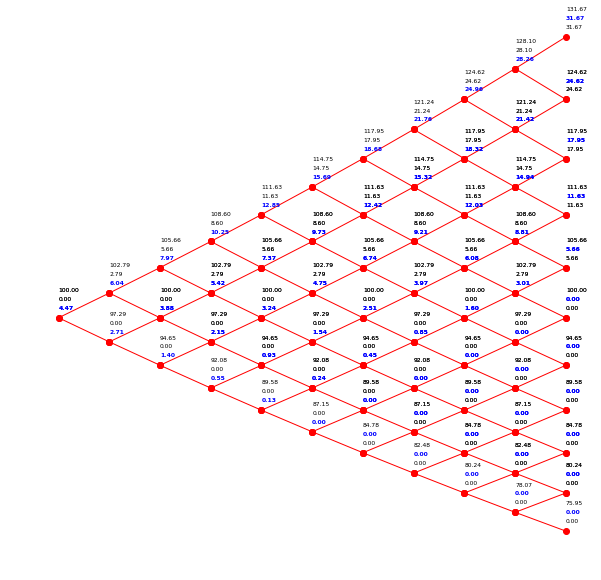

<Figure size 8000x8000 with 0 Axes>

In [2]:
#American Call, u = 1/d
import numpy as num
import pylab as plt
import matplotlib
from matplotlib.pyplot import figure

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
import math

# Structures & functions

class TransitionPoint:
    def __init__(self, sn, en, el, ov):
        self.exNow = en
        self.exLater = el
        self.exMax = num.maximum(en, el)
        self.optValue = ov
        self.stepNo = sn


class Transition:
    def __init__(self, sn, sp, ep):
        self.startPoint = sp
        self.endPoint = ep
        self.stepNo = sn


def plot_transition(tr):
    x0 = tr.stepNo * 4
    x1 = x0 + 4
    y0 = tr.startPoint.optValue
    y1 = tr.endPoint.optValue
    plt.plot((x0, x1), (y0, y1), 'ro-', lw=1)
    plt.text(int(x1), y1 + 3, "{:.2f}".format(tr.endPoint.optValue))
    if tr.endPoint.exNow < tr.endPoint.exLater:
        plt.text(int(x1), y1 + 2, "{:.2f}".format(tr.endPoint.exNow))
        plt.text(int(x1), y1 + 1, "{:.2f}".format(tr.endPoint.exLater), color='b', fontweight='bold')
    else:
        plt.text(int(x1), y1 + 2, "{:.2f}".format(tr.endPoint.exNow), color='b', fontweight='bold')
        plt.text(int(x1), y1 + 1, "{:.2f}".format(tr.endPoint.exLater))
    if tr.stepNo == 0:
        plt.text(int(x0), y0 + 3, "{:.2f}".format(tr.startPoint.optValue))
        if tr.startPoint.exNow < tr.startPoint.exLater:
            plt.text(int(x0), y0 + 2, "{:.2f}".format(tr.startPoint.exNow))
            plt.text(int(x0), y0 + 1, "{:.2f}".format(tr.startPoint.exLater), color='b', fontweight='bold')
        else:
            plt.text(int(x0), y0 + 2, "{:.2f}".format(tr.startPoint.exNow), color='b', fontweight='bold')
            plt.text(int(x0), y0 + 1, "{:.2f}".format(tr.startPoint.exLater))


# Parameters

S0 = 100.;  # Initial value of underlying asset
K = 98.;  # Strike price
T = 1;  # Expiration time
r = 0.06;  # Risk free rate
sigma = 0.1;  # Volatility

M = 10.;  # Number of steps
dt = float(T / M);  # Size of each step
D = 0.03


A = (1/2)*(math.exp(-1*(r-D)*dt)+math.exp((r-D+sigma**2)*dt));
u = A + math.sqrt(A**2 - 1)
d = A - math.sqrt(A**2 - 1);
p = (math.exp((r-D)*dt)-d)/(u-d);

# Powers of u and d needed to generate all asset values in the binomial tree

dpowers = d ** num.arange(M, -1, -1);
upowers = u ** num.arange(0, M + 1);

# Time T option values

optionValue = num.maximum(S0 * dpowers * upowers-K, 0);
optionValueStart = S0 * dpowers * upowers

matrix = []
matrixB = []
matrix.append(optionValue)

row = []
for j in range(0, len(optionValue), 1):
    tp = TransitionPoint(int(M), optionValue[j], optionValue[j], optionValueStart[j])
    row.append(tp)
matrixB.append(row)

# Work back to option value at time zero
for i in range(int(M) - 1, -1, -1):
    Si = S0 * upowers[range(0, i + 1)] * dpowers[range(int(M) - i, int(M) + 1)];
    exNow = num.maximum(Si-K, 0)
    expectedValue = (p * optionValue[range(1, i + 2)] + (1 - p) * optionValue[range(0, i + 1)])
    exLater = math.exp(-r * dt) * expectedValue
    optionValue = num.maximum(exNow, exLater)
    matrix.append(optionValue)
    row = []
    for j in range(0, len(Si), 1):
        tp = TransitionPoint(i, exNow[j], exLater[j], Si[j])
        row.append(tp)
    matrixB.append(row)

# transitions list, transformed matrixB
transitions = []
noOfSteps = int(M)
for i in range(1, noOfSteps + 1, 1):
    startValues = matrixB[i]
    endValues = matrixB[i-1]
    for j in range(0, noOfSteps + 1 - i, 1):
        startValue = startValues[j]
        endValueUp = endValues[j]
        endValueDown = endValues[j + 1]
        transitions.append(Transition(noOfSteps - i, startValue, endValueUp))
        transitions.append(Transition(noOfSteps - i, startValue, endValueDown))


# plot transitions
noOfTransitions = len(transitions)

fig = plt.figure()
ax = plt.axes()
ax.autoscale()
ax.set_axis_off()
matplotlib.rcParams.update({'font.size': 6})

for i in range(0, noOfTransitions, 1):
    plot_transition(transitions[i])
figure(num=None, figsize=(10, 10), dpi=800, facecolor='w', edgecolor='k')
plt.show()
fig.savefig('AmericanCall2.png', dpi=200)